In [2]:
#Imports
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

In [3]:
#Load the testing and training data
df_titanic = pd.read_csv('data/train.csv')

In [4]:
#identifying features and target from dataset
y_titanic = df_titanic.iloc[:,1]
X_titanic = df_titanic.iloc[:,[2,4,5,6,7,9,11]]

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_titanic)

OneHotEncoder(handle_unknown='ignore')

In [6]:
#Split testing and training data
X_train, x_test, y_train, Y_test = train_test_split(enc.transform(X_titanic), y_titanic, test_size=0.20, random_state=42)

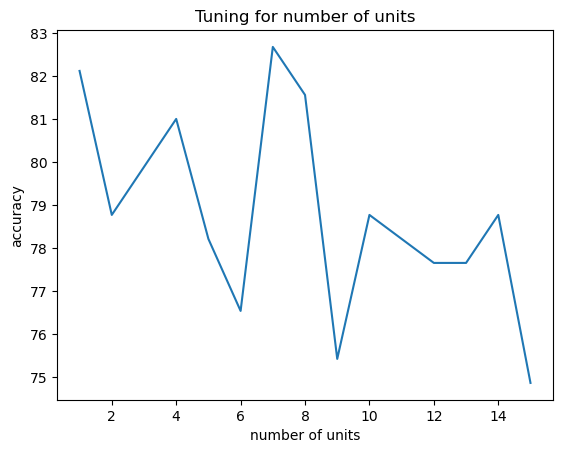

In [7]:
#tuning MLP for number of units
accuracy = []
units = []
for i in range(15):
    mlp = MLPClassifier(random_state=42, max_iter=5000, hidden_layer_sizes=(i+1))
    mlp.fit(X_train,y_train)
    accuracy.append((accuracy_score(Y_test, mlp.predict(x_test))*100))
    units.append(i+1)
plt.plot(units,accuracy)
plt.xlabel("number of units")
plt.ylabel("accuracy")
plt.title("Tuning for number of units")
plt.show()

In [9]:
#MLP with 7 units in the hidden layer giving most optimum results
mlp = MLPClassifier(random_state=42, max_iter=5000, hidden_layer_sizes=(7))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=5000, random_state=42)

In [10]:
#Random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
#Adaboost
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

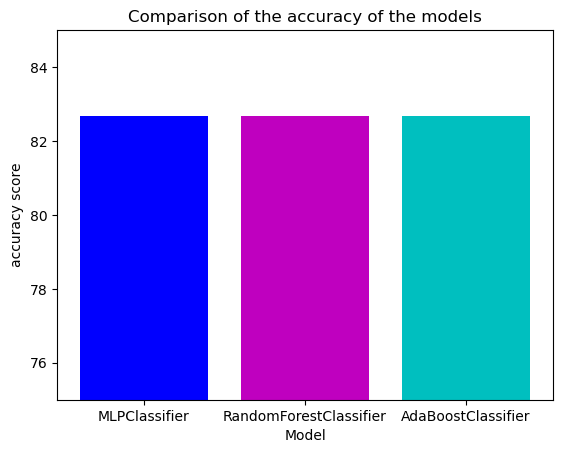

In [32]:
#Comparison between the classifiers
performance = []
model = [mlp, rf, ab]

for i in range(3):
    performance.append(accuracy_score(Y_test,model[i].predict(x_test))*100)
    model[i] = str(model[i]).split('(')[0]

plt.bar(model, performance, color=['b', 'm', 'c'])
plt.xlabel("Model")
plt.ylabel("accuracy score")
plt.ylim(75,85)
plt.title("Comparison of the accuracy of the models")
plt.show()